In [1]:
import pandas as pd


In [22]:
data = pd.read_excel('heart_disease.xlsx')


In [7]:
data.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
data.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<Axes: ylabel='HeartDisease'>

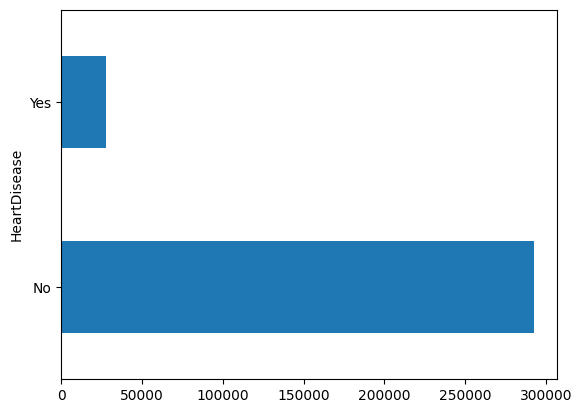

In [23]:
data.HeartDisease.value_counts().plot(kind='barh')


In [13]:
import seaborn as sns


<Axes: xlabel='HeartDisease', ylabel='count'>

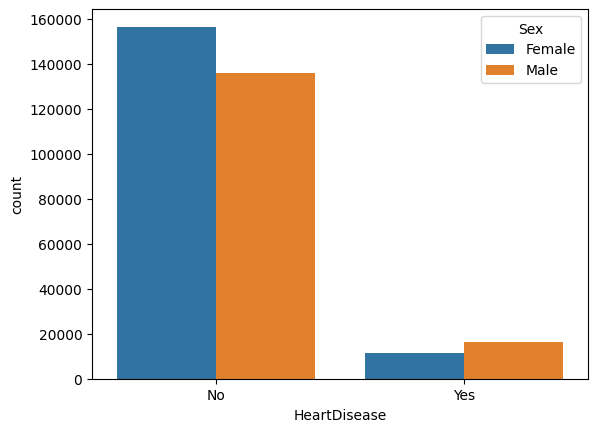

In [15]:
sns.countplot(
    x='HeartDisease', hue='Sex', data=data
)


In [38]:
data.dtypes


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder


In [45]:
le = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])


In [47]:
data.dtypes


HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime             int64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [48]:
Y = data['HeartDisease']
X = data.drop('HeartDisease', axis=1)


In [49]:
from sklearn.feature_selection import mutual_info_classif


In [50]:
features = mutual_info_classif(X, Y)


In [51]:
features


array([0.00291089, 0.03435429, 0.00179739, 0.01186528, 0.01311976,
       0.00212093, 0.01847263, 0.04109907, 0.03718636, 0.06016096,
       0.01532695, 0.06481983, 0.05101326, 0.02008672, 0.00410366,
       0.00660743, 0.00584235])

In [53]:
imp_feat = pd.Series(features, data.columns[0:len(data.columns)-1])
imp_feat


HeartDisease        0.002911
BMI                 0.034354
Smoking             0.001797
AlcoholDrinking     0.011865
Stroke              0.013120
PhysicalHealth      0.002121
MentalHealth        0.018473
DiffWalking         0.041099
Sex                 0.037186
AgeCategory         0.060161
Race                0.015327
Diabetic            0.064820
PhysicalActivity    0.051013
GenHealth           0.020087
SleepTime           0.004104
Asthma              0.006607
KidneyDisease       0.005842
dtype: float64

<Axes: >

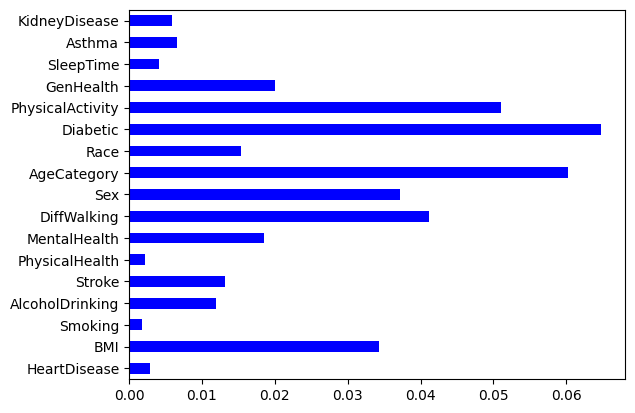

In [54]:
imp_feat.plot(kind='barh', color='blue')


In [63]:
from sklearn.preprocessing import StandardScaler


In [66]:
Sc = StandardScaler()
X = Sc.fit_transform(X)


In [67]:
from sklearn.model_selection import train_test_split


In [76]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


In [77]:
from sklearn.neighbors import KNeighborsClassifier


In [78]:
model = KNeighborsClassifier(n_neighbors=2)


In [79]:
model.fit(X, Y)


KNeighborsClassifier(n_neighbors=2)

In [80]:
prediction = model.predict(X_Test)


In [81]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [84]:
ac = accuracy_score(prediction, Y_Test)
print(ac*100)


93.48332525524164


In [89]:
cm = confusion_matrix(Y_Test, prediction)
cm


array([[58508,     4],
       [ 4164,  1283]], dtype=int64)

In [92]:
score = f1_score(prediction, Y_Test)
print(score*100)


38.10513810513811
